In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.signal import find_peaks_cwt
from scipy import interpolate
import _pickle as cPickle

length = 184343 + 1
# Read data that user skip part of the video
data = cPickle.load(open('/Users/yuyunli/Downloads/yuyun.pkl', 'rb'))
data = np.array(data)

# Change duration from 483013 to 184343
a = data[:,2] == '483013'
data[a,2] = '184343'
print(data)

# Read data that user did wrong in corresponding problem
df = pd.read_csv('/Users/yuyunli/Downloads/query_result-4.csv')
data2 = np.array(df)
# print(data2)

[['56e53f97562da85a73cc48a2' '172.0' '184343']
 ['56fcd1309306d9f4130c61f9' '23509.0' '184343']
 ['570f1504268915a11ef3fb2f' '139195.0' '184343']
 ..., 
 ['5ac0e36e213d1e28efb512c9' '168598.0' '175200.0']
 ['5ac0e36e213d1e28efb512c9' '178157.0' '175200.0']
 ['5ac0e5084c6165259fd0c076' '2757.0' '24200.0']]


In [149]:
# Get user who did the problem wrong and also skip part of the video
u_wrong = []
for user in data2[:,0]:
    if user in data[:,0]:
        u_wrong.append(user)
# print(u_wrong)

In [150]:
# Append skip time 
time = []
for user in u_wrong:
    if user in data[:,0]:
        index = data[:,0] == user
        # Change data type to "" to int
        if sum(index) == 1:
            start = int(float(data[index, 1][0]))
            end = int(float(data[index, 2][0]))          
            time.append([start, end])
        else:
            mul_start = data[index, 1]
            mul_end = data[index, 2]
            for i in range(sum(index)):
                time.append([int(float(mul_start[i])), int(float(mul_end[i]))])
time = np.array(time)

In [151]:
time_list = [0] * (184343+1)
for ele in time:
    for i in range(ele[0],ele[1]):
        if ele[0] < ele[1]:
            time_list[i] += 1
# print(time_list)

Text(0.5,1,'The part students skip')

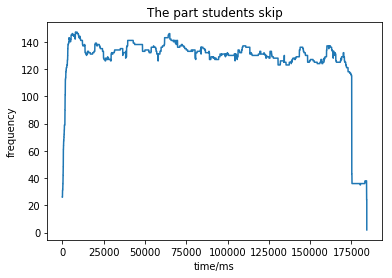

In [152]:
# Plor for original data
plt.plot(time_list)
plt.xlabel('time/ms')
plt.ylabel('frequency')
plt.title('The part students skip')

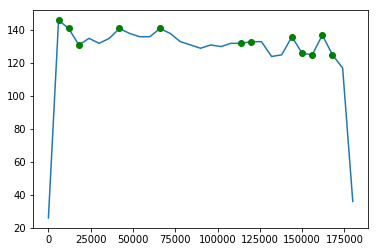

In [153]:
# Plot after fitting
x = np.arange(0, length)
f = interpolate.interp1d(x, time_list)
x_new = np.arange(0, length-1, 6000)
y_new = f(x_new)
plt.plot(x_new,y_new)
# Arange is 5 here
indexes = find_peaks_cwt(y_new, np.arange(1,5))
for index in indexes:
    plt.plot((index-1)*6000,y_new[index-1],'go-')

In [143]:
# Find peak
final_index = []
todo_peak = y_new[indexes-1]
print(todo_peak)
length2 = len(todo_peak)
if length2 == 1:
    final_index = (indexes-1)*6000
for i in range(length2):
    if i == 0 and todo_peak[i] >= todo_peak[i+1]:
        final_index.append((indexes[i]-1)*6000)
    elif i == length-1 and todo_peak[i] >= todo_peak[i-1]:
        final_index.append((indexes[i]-1)*6000)
    elif todo_peak[i] >= todo_peak[i-1] and todo_peak[i] >= todo_peak[i+1]:
        final_index.append((indexes[i]-1)*6000)
print(final_index)

[ 146.  141.  131.  141.  141.  132.  133.  136.  126.  125.  137.  125.]
[6000, 42000, 66000, 144000, 162000]


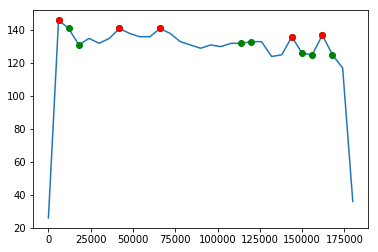

In [154]:
# Final dot found in the picture
plt.plot(x_new,y_new)
for index in indexes:
    plt.plot((index-1)*6000,y_new[index-1],'go-')
for index in final_index:
    y_index = int(index/6000)
    plt.plot(index, y_new[y_index],'ro-')